In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2

In [2]:
classifier = Sequential()

In [3]:
# Convolution
classifier.add(Conv2D(32, 5, 5, input_shape = (256, 256, 3), activation = 'relu'))#,kernel_regularizer=l2(l2=0.001)
#classifier.add(BatchNormalization())
# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [4]:
# Adding a second convolutional layer
classifier.add(Conv2D(64, 5, 5, activation = 'relu'))#,kernel_regularizer=l2(l2=0.001)
#classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))

In [5]:
# Flattening
classifier.add(Flatten())

In [6]:
# Full connection
classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dropout(0.4))
classifier.add(Dense(1, activation = 'sigmoid'))

In [7]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 51, 51, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 2, 2, 64)          0         
                                                                 
 flatten (Flatten)           (None, 256)               0

In [8]:
classifier.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
# To generate more images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, # Rotate img anticlockwise
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('C:/Users/reddy/Desktop/online deep learning/train',
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

Found 40 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('C:/Users/reddy/Desktop/online deep learning/test',
                                            target_size = (256, 256),
                                            batch_size = 16,
                                            class_mode = 'binary')



Found 20 images belonging to 2 classes.


In [13]:
! pip install livelossplot

In [14]:
from livelossplot import PlotLossesKerasTF

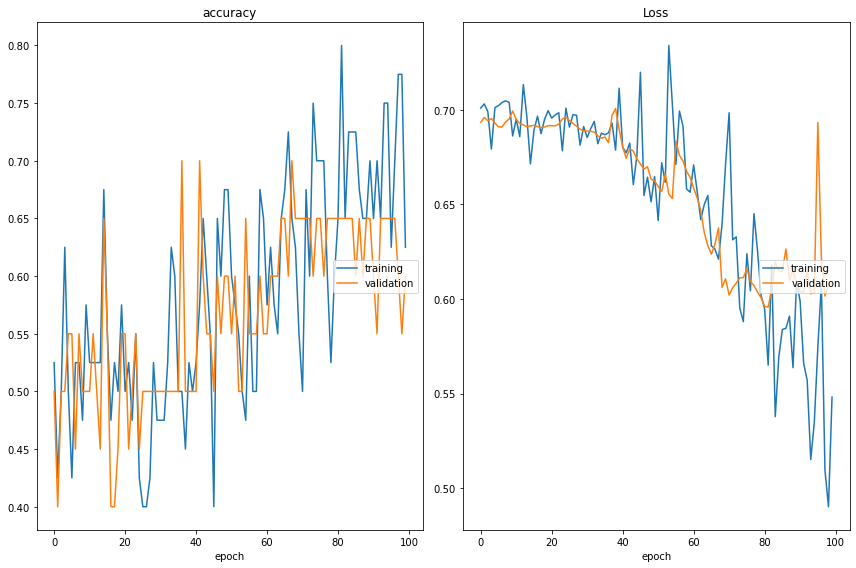

accuracy
	training         	 (min:    0.400, max:    0.800, cur:    0.625)
	validation       	 (min:    0.400, max:    0.700, cur:    0.600)
Loss
	training         	 (min:    0.490, max:    0.734, cur:    0.548)
	validation       	 (min:    0.596, max:    0.701, cur:    0.608)
3/3 [==============================] - 1s 611ms/step - loss: 0.5482 - accuracy: 0.6250 - val_loss: 0.6084 - val_accuracy: 0.6000


In [15]:
classifier.fit(training_set,epochs=100,validation_data = test_set,callbacks=[PlotLossesKerasTF()])


For 100 epochs training accuracy is 62% and validation accuracy is 60%.Loss is 0.5482

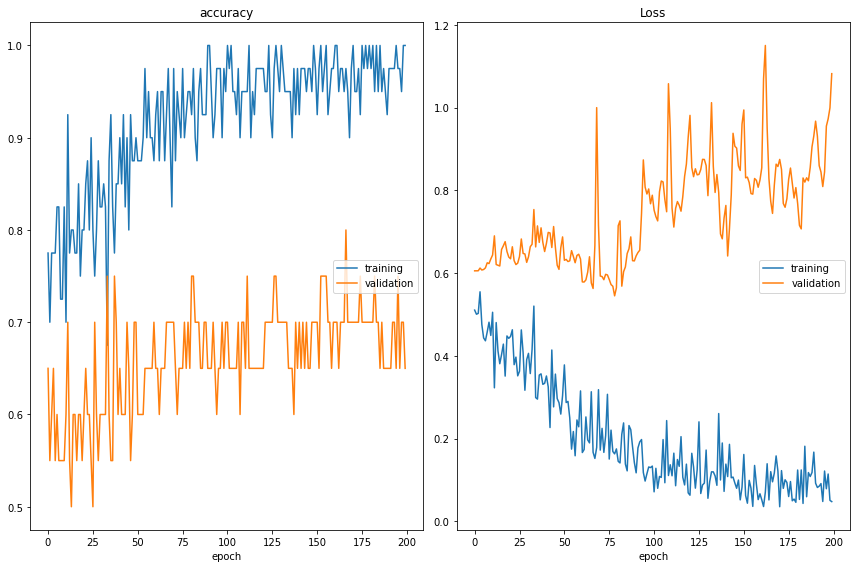

accuracy
	training         	 (min:    0.675, max:    1.000, cur:    1.000)
	validation       	 (min:    0.500, max:    0.800, cur:    0.650)
Loss
	training         	 (min:    0.035, max:    0.555, cur:    0.048)
	validation       	 (min:    0.545, max:    1.150, cur:    1.082)
3/3 [==============================] - 1s 465ms/step - loss: 0.0477 - accuracy: 1.0000 - val_loss: 1.0821 - val_accuracy: 0.6500


In [16]:
# for 200 epochs
classifier.fit(training_set,epochs=200,validation_data = test_set,callbacks=[PlotLossesKerasTF()])

For 200 epochs taining accuracy is 100% and validation accuracy is 65% and loss is 0.048,it leads to overfitting.So early stopping is required at 100 epochs.

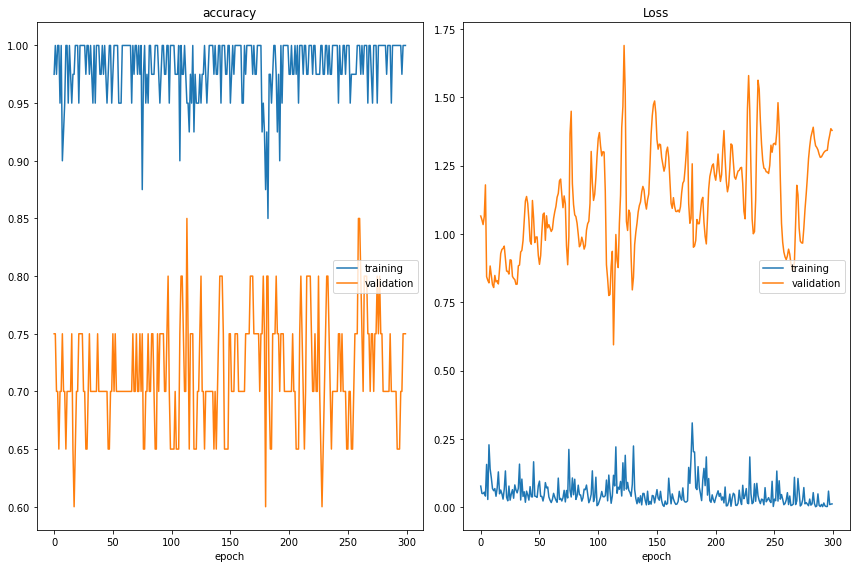

accuracy
	training         	 (min:    0.850, max:    1.000, cur:    1.000)
	validation       	 (min:    0.600, max:    0.850, cur:    0.750)
Loss
	training         	 (min:    0.002, max:    0.309, cur:    0.013)
	validation       	 (min:    0.594, max:    1.689, cur:    1.378)
3/3 [==============================] - 1s 576ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 1.3784 - val_accuracy: 0.7500


In [17]:
# for 300 epochs
classifier.fit(training_set,epochs=300,validation_data = test_set,callbacks=[PlotLossesKerasTF()])

For 300 epochs training accuracy is 100% and validation accuracy is 75% and loss is 0.013,it leads to overfitting.So early stopping is required at 100 epochs.